<a href="https://colab.research.google.com/github/feuziq47/DL/blob/master/DL3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!nvidia-smi

Wed Jul 24 01:43:26 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P8    33W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
# 입력 텐서와 타깃 텐서로 이루어진 훈련데이터를 정의
import numpy as np

input_tensor=np.random.rand(100,50)
target_tensor=np.random.randint(low=0,high=10,size=100)

In [0]:
# 입력과 타깃을 매핑하는 층으로 이루어진 네트워크(모델)을 정의
from tensorflow.keras import models
from tensorflow.keras import layers

model=models.Sequential()
model.add(layers.Dense(units=32,activation='relu',input_shape=(50,)))
model.add(layers.Dense(units=1))

In [0]:
# 손실 함수, 옵티마이저, 모니터링 하기 위한 성능 지표 선택하여 학습 과정을 설정
from tensorflow.keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss='mse',metrics=['accuracy'])

In [0]:
# 훈련 데이터에 대해 모델 객체의 fit() method 실행
model.fit(x=input_tensor,y=target_tensor,batch_size=10,epochs=10)

In [3]:
# keras API를 이용하여 mnist dataset 다운로드 및 numpy 형태로 생성
from tensorflow.keras.datasets import mnist
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
# 딥러닝 모델에서 학습하기 쉬운 형태로 input_data 전처리(정규화)
train_images=train_images.reshape((60000,28*28))
train_images=train_images.astype('float32')/255

test_images=test_images.reshape((10000,28*28))
test_images=test_images.astype('float32')/255

In [0]:
# 딥러닝 모델에서 학습하기 쉬운 형태로 output_data 전처리(정규화)
from tensorflow.keras.utils import to_categorical

train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)

In [0]:
# 입력과 타깃을 매핑하는 층으로 이루어진 네트워크(모델)을 정의
from tensorflow.keras import models
from tensorflow.keras import layers

model=models.Sequential()
model.add(layers.Dense(units=512,activation='relu',input_shape=(28*28,)))
model.add(layers.Dense(units=256,activation='relu'))
model.add(layers.Dense(units=128,activation='relu'))
model.add(layers.Dense(units=64,activation='relu'))
model.add(layers.Dense(units=10,activation='softmax'))

In [0]:
# 학습환경 파라미터 설정
from tensorflow.keras import optimizers
model.compile(optimizer='rmsprop',loss='mse',metrics=['accuracy'])

In [23]:
# fit() method 실행
model.fit(train_images,train_labels,batch_size=64,epochs=10)

Epoch 1/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.0113 - acc: 0.9227
Epoch 2/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.0053 - acc: 0.9660
Epoch 3/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0040 - acc: 0.9743
Epoch 4/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.0033 - acc: 0.9797
Epoch 5/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.0028 - acc: 0.9825
Epoch 6/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.0026 - acc: 0.9843
Epoch 7/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0023 - acc: 0.9862
Epoch 8/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0021 - acc: 0.9878
Epoch 9/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0021 - acc: 0.9880
Epoch 10/10
60000/60000 [==============================] - 5s 79us/sample - loss: 

In [24]:
# Evaluate
test_loss,test_acc=model.evaluate(x=test_images,y=test_labels)

10000/10000 [==============================] - 1s 72us/sample - loss: 0.0032 - acc: 0.9807


In [14]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [15]:
ls

drive/  sample_data/


In [16]:
cd drive/My Drive/DeepLearn

/content/drive/My Drive/DeepLearn


In [0]:
# 학습된 모델 save
model.save('ex_model.h5')

In [18]:
# save 모델 불러오기
ex_model=models.load_model('/content/drive/My Drive/DeepLearn/ex_model.h5')

W0724 02:02:56.765970 140112416839552 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0724 02:02:56.771572 140112416839552 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [20]:
# 불러온 모델 평가
test_loss,test_acc=ex_model.evaluate(x=test_images,y=test_labels)

10000/10000 [==============================] - 1s 66us/sample - loss: 0.0031 - acc: 0.9808


In [3]:
  # mnist 데이터셋 다운로드
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models
from tensorflow.keras import layers
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

train_images=train_images.reshape((60000,28,28,1))
train_images=train_images.astype('float32')/255

test_images=test_images.reshape((10000,28,28,1))
test_images=test_images.astype('float32')/255


train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)


model=models.Sequential()
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'))

W0724 05:15:59.921667 139971215579008 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
# CNN의 모델 중 합성곱 FC 모듈로 구성된 분류 부분 구현
model.add(layer=layers.Flatten())
model.add(layers.Dense(units=64,activation='relu'))
model.add(layers.Dense(units=10,activation='softmax'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [0]:
from tensorflow.keras import optimizers
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [9]:
history=model.fit(train_images,train_labels,batch_size=64,epochs=5,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 4s 73us/sample - loss: 0.0166 - acc: 0.9944 - val_loss: 0.0446 - val_acc: 0.9887
Epoch 2/5
48000/48000 [==============================] - 3s 69us/sample - loss: 0.0135 - acc: 0.9957 - val_loss: 0.0432 - val_acc: 0.9889
Epoch 3/5
48000/48000 [==============================] - 3s 69us/sample - loss: 0.0108 - acc: 0.9969 - val_loss: 0.0404 - val_acc: 0.9904
Epoch 4/5
48000/48000 [==============================] - 3s 69us/sample - loss: 0.0089 - acc: 0.9971 - val_loss: 0.0484 - val_acc: 0.9893
Epoch 5/5
48000/48000 [==============================] - 3s 69us/sample - loss: 0.0081 - acc: 0.9975 - val_loss: 0.0507 - val_acc: 0.9898


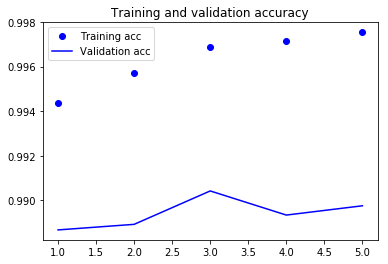

In [10]:
import matplotlib.pyplot as plt

acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

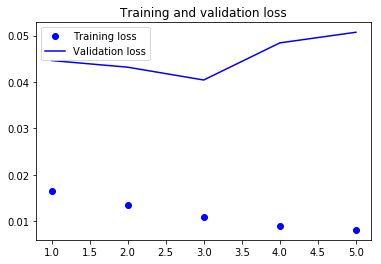

In [11]:
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()